## Basic Principles to represent statistical data

Show different ways to present statistical data.

This script is written in MATLAB or IPpython style, to show how best to use Python interactively. Note than in IPython, the show() commands are automatically generated. The examples contain:

+ scatter plots
+ histograms
+ KDE
+ errorbars
+ boxplots
+ probplots
+ cumulative density functions
+ regression fits

after: Thomas Haslwanter, April-2020

### Getting things ready

First, import the libraries that you are going to need. You could also do that later, but it is better style to do that at the beginning. pylab imports the numpy, scipy, and matplotlib.pyplot libraries into the current environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_context('notebook')
sns.set_style('darkgrid')

In [2]:
# Generate data that are normally distributed
x = np.random.randn(50)

### Scatter plot

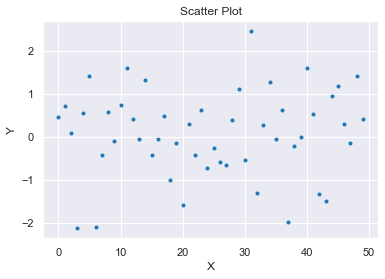

In [3]:
plt.plot(x,'.')
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.draw()

### Histogram

Text(0.5, 1.0, 'Histogram, default settings')

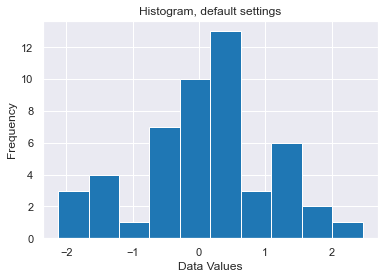

In [4]:
plt.hist(x)
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram, default settings')

In [5]:
x = np.random.randn(1000)

Text(0.5, 1.0, 'Histogram, 50 bins')

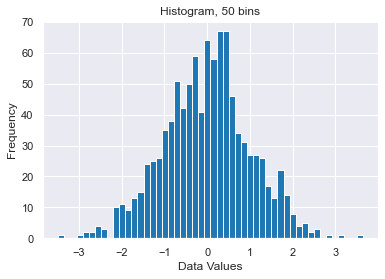

In [6]:
plt.hist(x,50)
plt.xlabel('Data Values')
plt.ylabel('Frequency')
plt.title('Histogram, 50 bins')

### KDE
Kernel Density Estimation (KDE)

Text(0, 0.5, 'Density')

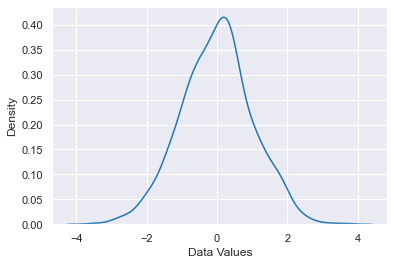

In [7]:
import seaborn as sns
sns.kdeplot(x)
plt.xlabel('Data Values')
plt.ylabel('Density')

### Cumulative probability density

Text(0.5, 1.0, 'Cumulative probablity density function')

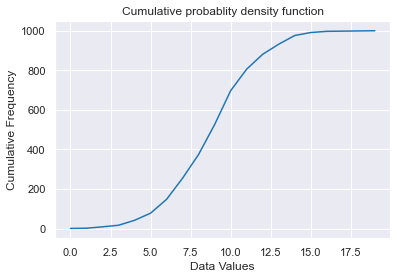

In [8]:
numbins = 20
cdf = stats.cumfreq(x,numbins)
plt.plot(cdf[0])
plt.xlabel('Data Values')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative probablity density function')

### Boxplot
Box-plot is a way to graphically visualize the statistical properties of the data. It provides information about the minimum, first quartile (Q1), median (Q2), upper quartile (Q3), maximum, and outliers if present. Boxplot is used to make boxplot.

Text(0, 0.5, 'Values')

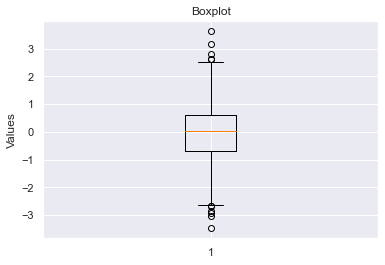

In [9]:
# The error bars indicate 1.5* the inter-quartile-range (IQR), and the box consists of the
# first, second (middle) and third quartile
plt.boxplot(x, sym='o')
plt.title('Boxplot')
plt.ylabel('Values')

Text(0.5, 0, 'Values')

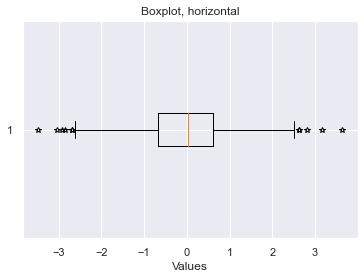

In [10]:
plt.boxplot(x, vert=False, sym='*')
plt.title('Boxplot, horizontal')
plt.xlabel('Values')

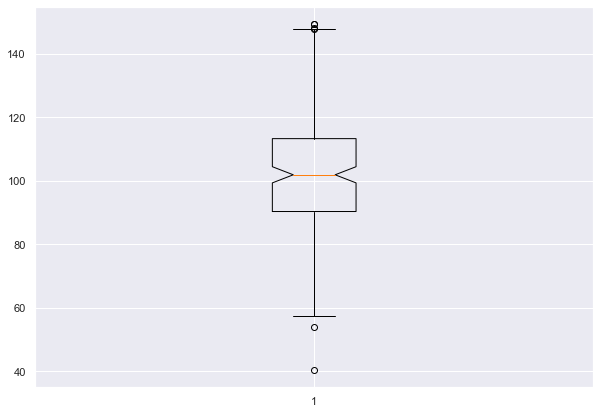

In [11]:
# some different features
#  see https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

# Creating dataset
np.random.seed(10)
data = np.random.normal(100, 20, 200)

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data, 'gD')

# show plot
plt.show()

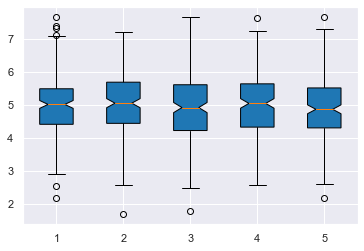

In [12]:
n = 5
x = range(n)
y = 5+np.random.randn(200,5)

plt.boxplot(y,'gD', patch_artist=True)

plt.show()

### Errorbars

(-0.2, 19.0)

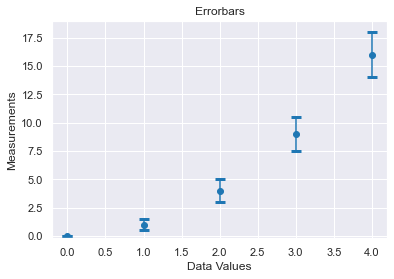

In [13]:
x = np.arange(5)
y = x**2
errorBar = x/2
plt.errorbar(x,y, yerr=errorBar, fmt='o', capsize=5, capthick=3)

plt.xlabel('Data Values')
plt.ylabel('Measurements')
plt.title('Errorbars')

plt.xlim([-0.2, 4.2])
plt.ylim([-0.2, 19])

### Check for Normality

Text(0.5, 1.0, 'Probplot - check for normality')

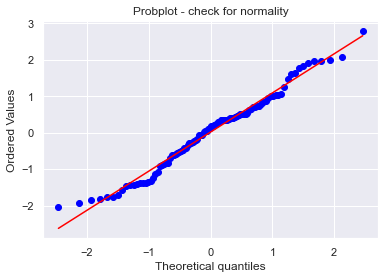

In [14]:
# Visual check
x = np.random.randn(100)
_ = stats.probplot(x, plot=plt)
plt.title('Probplot - check for normality')

### 2D Plot

Text(0, 0.5, 'Y')

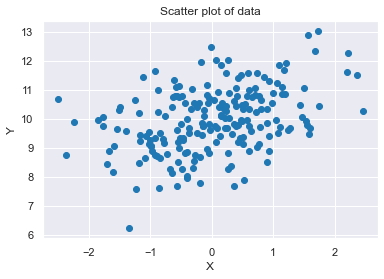

In [15]:
# Generate data
x = np.random.randn(200)
y = 10+0.5*x+np.random.randn(len(x))

# Scatter plot
plt.scatter(x,y)
# This one is quite similar to "plot(x,y,'.')"
plt.title('Scatter plot of data')
plt.xlabel('X')
plt.ylabel('Y')

### LineFit

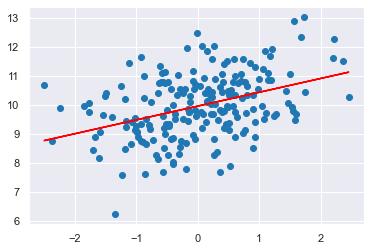

In [16]:
M = np.vstack((np.ones(len(x)), x)).T
pars = np.linalg.lstsq(M,y, rcond=None)[0]
intercept = pars[0]
slope = pars[1]
plt.scatter(x,y)
plt.plot(x, intercept + slope*x, 'r')
plt.show()

### 3d Plots

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi
from mpl_toolkits.mplot3d.axes3d import Axes3D

Simple 3 D plots To make three dimensional plot, we need to import Axes3D library from the mpl_toolkits.mplot3d. The scatter or line plot in three dimension is made in the way similar to two dimension. We will generate three variables, and make the three dimensional scatter plot.

Text(0.5, 0, 'z')

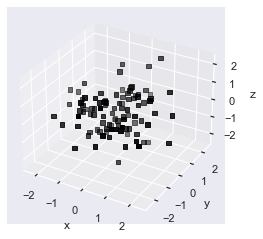

In [18]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='k', marker='s')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [19]:
# Some more advance d3-D visualization
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)

alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

Z = flux_qubit_potential(X, Y).T

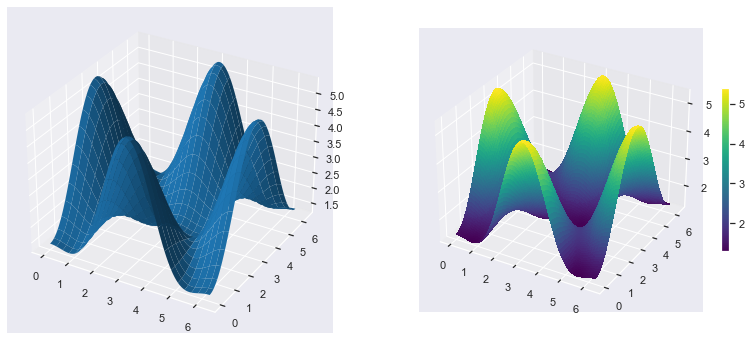

In [20]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,  cmap=plt.cm.viridis, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)